In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as asm
from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Thinkful Data Science/Capstone II: Supervised Learning/dataset-of-80s.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6908 entries, 0 to 6907
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6908 non-null   object 
 1   artist            6908 non-null   object 
 2   uri               6908 non-null   object 
 3   danceability      6908 non-null   float64
 4   energy            6908 non-null   float64
 5   key               6908 non-null   int64  
 6   loudness          6908 non-null   float64
 7   mode              6908 non-null   int64  
 8   speechiness       6908 non-null   float64
 9   acousticness      6908 non-null   float64
 10  instrumentalness  6908 non-null   float64
 11  liveness          6908 non-null   float64
 12  valence           6908 non-null   float64
 13  tempo             6908 non-null   float64
 14  duration_ms       6908 non-null   int64  
 15  time_signature    6908 non-null   int64  
 16  chorus_hit        6908 non-null   float64


**Column Names**

- track: The name of the track.

- artist: The name of the artist.

- uri: The resource identifier for the track.

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.

- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db. 

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. 

- instrumentalness: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. 

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- tempo: The overall estimated tempo of a track in beats per minute (BPM). 

- duration_ms:  The duration of the track in milliseconds.

- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- chorus_hit: This is the author's best estimate of when the chorus would start for the track. 

- sections: The number of sections track has.

- target: The target variable for the track. It can be either '0' or '1'. '1' means track is a hit, '0' means track is a flop. The author's condition of a track being 'flop' is as follows:
        - The track must not appear in the 'hit' list of that decade.
        - The track's artist must not appear in the 'hit' list of that decade.
        - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
        - The track's genre must not have a song in the 'hit' list.
        - The track must have 'US' as one of its markets.

In [5]:
df.head(3)

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Walking Blues,Big Joe Williams,spotify:track:1ZjN5X8LmUB67pWPgimW3B,0.509,0.277,6,-14.323,1,0.0495,0.827,0.00206,0.0756,0.640,101.157,161893,4,68.46530,7,0
1,Suddenly Last Summer,The Motels,spotify:track:4fLIM0B1WwrLux9RdnMvze,0.716,0.753,2,-5.682,1,0.0286,0.162,0.03060,0.0831,0.561,120.141,222000,4,57.71583,11,1
2,Sanctuary,Béla Fleck,spotify:track:3DwlNfiCQSdj0GOxYkR9Rq,0.360,0.542,5,-13.885,1,0.0339,0.368,0.16500,0.1160,0.803,116.831,444907,4,30.34574,17,0


In [6]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6908.000000,6.908000e+03,6908.000000,6908.000000,6908.000000,6908.000000
mean,0.564258,0.608037,5.233353,-11.041894,0.687609,0.057906,0.293067,0.139863,0.201009,0.587922,120.649572,2.547564e+05,3.926317,39.755172,11.277649,0.500000
std,0.173084,0.242962,3.597246,4.681166,0.463502,0.057768,0.302950,0.288144,0.181664,0.263604,27.108127,1.073213e+05,0.356433,19.136360,4.472095,0.500036
min,0.065600,0.000276,0.000000,-39.940000,0.000000,0.022300,0.000001,0.000000,0.018600,0.000010,39.002000,2.951400e+04,1.000000,0.000000,1.000000,0.000000
25%,0.455000,0.436000,2.000000,-13.451000,0.000000,0.032700,0.033375,0.000003,0.084900,0.383000,102.608500,2.045468e+05,4.000000,27.441758,9.000000,0.000000
50%,0.582000,0.637000,5.000000,-10.662000,1.000000,0.040600,0.172000,0.000321,0.131000,0.622000,119.546000,2.418600e+05,4.000000,35.581815,11.000000,0.500000
75%,0.690000,0.809000,9.000000,-7.640250,1.000000,0.058000,0.499000,0.045250,0.266000,0.811000,135.175250,2.870168e+05,4.000000,47.318412,13.000000,1.000000
max,0.988000,1.000000,11.000000,-0.683000,1.000000,0.903000,0.996000,1.000000,0.997000,0.990000,217.396000,2.223827e+06,5.000000,433.182000,73.000000,1.000000


In [7]:
df.nunique()

track               6604
artist              2021
uri                 6898
danceability         848
energy              1067
key                   12
loudness            5512
mode                   2
speechiness          948
acousticness        2431
instrumentalness    3073
liveness            1384
valence             1110
tempo               6641
duration_ms         5669
time_signature         4
chorus_hit          6854
sections              51
target                 2
dtype: int64

In [8]:
df = df.drop(['track', 'uri', 'mode', 'key', 'time_signature', 'sections'], axis=1)
df

,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,target
0,Big Joe Williams,0.509,0.277,-14.323,0.0495,0.827000,0.002060,0.0756,0.640,101.157,161893,68.46530,0
1,The Motels,0.716,0.753,-5.682,0.0286,0.162000,0.030600,0.0831,0.561,120.141,222000,57.71583,1
2,Béla Fleck,0.360,0.542,-13.885,0.0339,0.368000,0.165000,0.1160,0.803,116.831,444907,30.34574,0
3,The Pogues,0.656,0.512,-11.872,0.0290,0.585000,0.000000,0.0720,0.880,97.500,157893,50.97022,0
4,John Schneider,0.642,0.889,-5.620,0.0494,0.375000,0.000000,0.1800,0.764,163.351,162293,33.62053,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,Kishore Kumar,0.443,0.589,-8.085,0.0392,0.552000,0.000000,0.1410,0.963,97.401,384360,31.61135,0
6904,V8,0.208,0.750,-12.945,0.1080,0.000134,0.000002,0.0621,0.394,83.467,154827,23.71780,0
6905,Teddy Pendergrass,0.739,0.729,-9.694,0.0572,0.249000,0.007680,0.0690,0.884,103.339,375652,31.31730,1
6906,Boys Don't Cry,0.749,0.626,-12.426,0.0393,0.011500,0.567000,0.0558,0.770,142.565,366133,27.71571,1


In [9]:
df.isnull().sum()

artist              0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
chorus_hit          0
target              0
dtype: int64

Looked at dataset statistics and removed any columns deemed unnecessary in relation to target variable. Looked for any missing values in the dataset but there are no missing values. 

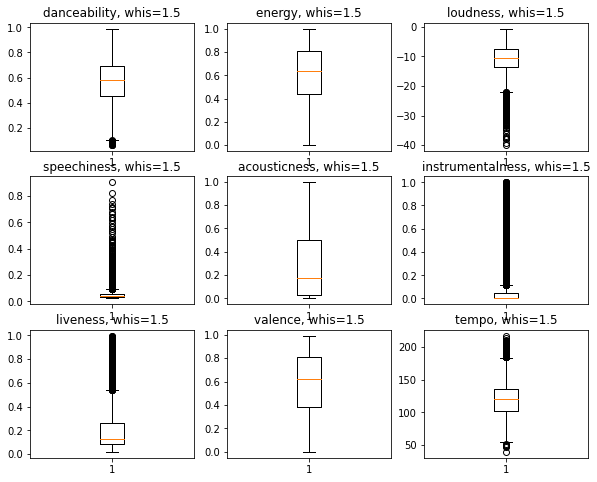

In [10]:
plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.boxplot(df['danceability'])
plt.title('danceability, whis=1.5')

plt.subplot(3,3,2)
plt.boxplot(df['energy'])
plt.title('energy, whis=1.5')

plt.subplot(3,3,3)
plt.boxplot(df['loudness'])
plt.title('loudness, whis=1.5')

plt.subplot(3,3,4)
plt.boxplot(df['speechiness'])
plt.title('speechiness, whis=1.5')

plt.subplot(3,3,5)
plt.boxplot(df['acousticness'])
plt.title('acousticness, whis=1.5')

plt.subplot(3,3,6)
plt.boxplot(df['instrumentalness'])
plt.title('instrumentalness, whis=1.5')

plt.subplot(3,3,7)
plt.boxplot(df['liveness'])
plt.title('liveness, whis=1.5')

plt.subplot(3,3,8)
plt.boxplot(df['valence'])
plt.title('valence, whis=1.5')

plt.subplot(3,3,9)
plt.boxplot(df['tempo'])
plt.title('tempo, whis=1.5')
plt.show()

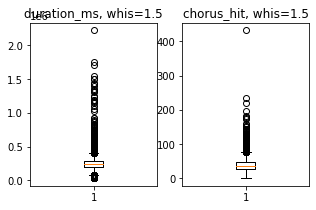

In [11]:
plt.figure(figsize=(5,3))

plt.subplot(1,2,1)
plt.boxplot(df['duration_ms'])
plt.title('duration_ms, whis=1.5')

plt.subplot(1,2,2)
plt.boxplot(df['chorus_hit'])
plt.title('chorus_hit, whis=1.5')
plt.show()

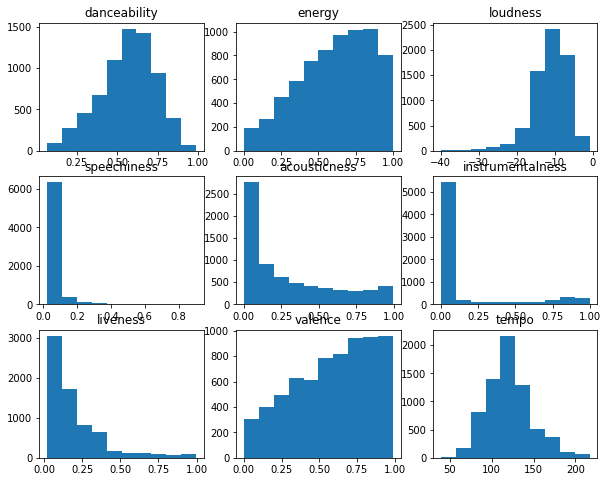

In [12]:
plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.hist(df['danceability'])
plt.title('danceability')

plt.subplot(3,3,2)
plt.hist(df['energy'])
plt.title('energy')

plt.subplot(3,3,3)
plt.hist(df['loudness'])
plt.title('loudness')

plt.subplot(3,3,4)
plt.hist(df['speechiness'])
plt.title('speechiness')

plt.subplot(3,3,5)
plt.hist(df['acousticness'])
plt.title('acousticness')

plt.subplot(3,3,6)
plt.hist(df['instrumentalness'])
plt.title('instrumentalness')

plt.subplot(3,3,7)
plt.hist(df['liveness'])
plt.title('liveness')

plt.subplot(3,3,8)
plt.hist(df['valence'])
plt.title('valence')

plt.subplot(3,3,9)
plt.hist(df['tempo'])
plt.title('tempo')
plt.show()

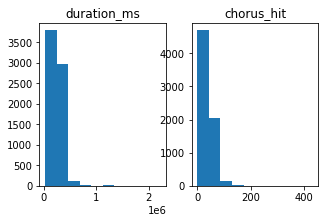

In [13]:
plt.figure(figsize=(5,3))

plt.subplot(1,2,1)
plt.hist(df['duration_ms'])
plt.title('duration_ms')

plt.subplot(1,2,2)
plt.hist(df['chorus_hit'])
plt.title('chorus_hit')
plt.show()

Looked for outliers within the features. 

In [14]:
numeric_df = df.drop(['artist'], axis=1)
numeric_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,target
0,0.509,0.277,-14.323,0.0495,0.827000,0.002060,0.0756,0.640,101.157,161893,68.46530,0
1,0.716,0.753,-5.682,0.0286,0.162000,0.030600,0.0831,0.561,120.141,222000,57.71583,1
2,0.360,0.542,-13.885,0.0339,0.368000,0.165000,0.1160,0.803,116.831,444907,30.34574,0
3,0.656,0.512,-11.872,0.0290,0.585000,0.000000,0.0720,0.880,97.500,157893,50.97022,0
4,0.642,0.889,-5.620,0.0494,0.375000,0.000000,0.1800,0.764,163.351,162293,33.62053,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6903,0.443,0.589,-8.085,0.0392,0.552000,0.000000,0.1410,0.963,97.401,384360,31.61135,0
6904,0.208,0.750,-12.945,0.1080,0.000134,0.000002,0.0621,0.394,83.467,154827,23.71780,0
6905,0.739,0.729,-9.694,0.0572,0.249000,0.007680,0.0690,0.884,103.339,375652,31.31730,1
6906,0.749,0.626,-12.426,0.0393,0.011500,0.567000,0.0558,0.770,142.565,366133,27.71571,1


In [15]:
for column in numeric_df:
  q75, q25 = np.percentile(numeric_df[column], [75 ,25])
  iqr = q75 - q25
  for threshold in np.arange(1,6,1):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print(column)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(len((np.where((numeric_df[column] > max_val) 
                      | (numeric_df[column] < min_val))[0]))))
    print('\n')

danceability
The score threshold is: 1
Number of outliers is: 317


danceability
The score threshold is: 2
Number of outliers is: 0


danceability
The score threshold is: 3
Number of outliers is: 0


danceability
The score threshold is: 4
Number of outliers is: 0


danceability
The score threshold is: 5
Number of outliers is: 0


energy
The score threshold is: 1
Number of outliers is: 108


energy
The score threshold is: 2
Number of outliers is: 0


energy
The score threshold is: 3
Number of outliers is: 0


energy
The score threshold is: 4
Number of outliers is: 0


energy
The score threshold is: 5
Number of outliers is: 0


loudness
The score threshold is: 1
Number of outliers is: 331


loudness
The score threshold is: 2
Number of outliers is: 100


loudness
The score threshold is: 3
Number of outliers is: 29


loudness
The score threshold is: 4
Number of outliers is: 7


loudness
The score threshold is: 5
Number of outliers is: 0


speechiness
The score threshold is: 1
Number of out

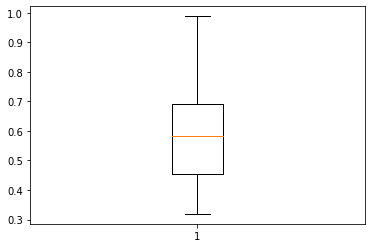

In [16]:
from scipy.stats.mstats import winsorize

dance = winsorize(numeric_df['danceability'], (0.10, 0))
plt.boxplot(dance)
plt.show()

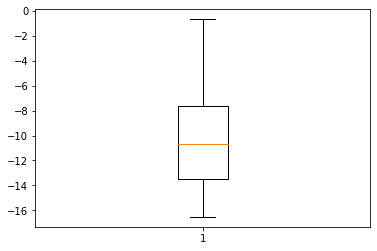

In [17]:
loud = winsorize(numeric_df['loudness'], (0.10, 0))
plt.boxplot(loud)
plt.show()

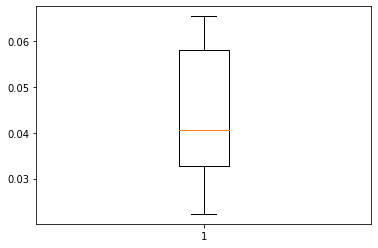

In [18]:
speech = winsorize(numeric_df['speechiness'], (0, 0.20))
plt.boxplot(speech)
plt.show()

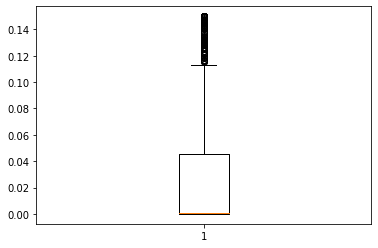

In [19]:
instrument = winsorize(numeric_df['instrumentalness'], (0, 0.2))
plt.boxplot(instrument)
plt.show()

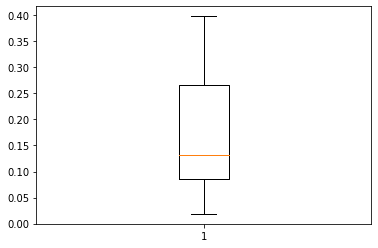

In [20]:
live = winsorize(numeric_df['liveness'], (0, 0.10))
plt.boxplot(live)
plt.show()

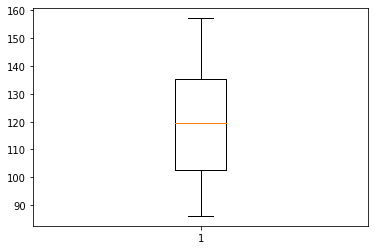

In [21]:
tempo = winsorize(numeric_df['tempo'], (0.1, 0.1))
plt.boxplot(tempo)
plt.show()

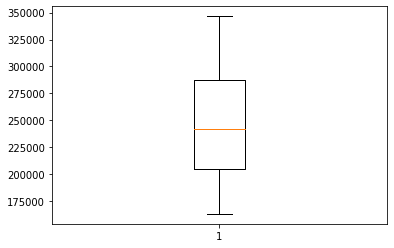

In [22]:
duration = winsorize(numeric_df['duration_ms'], (0.1, 0.1))
plt.boxplot(duration)
plt.show()

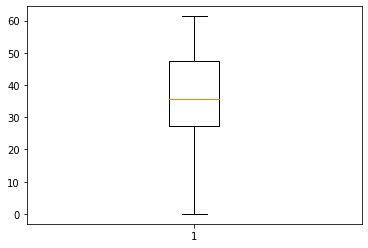

In [23]:
chorus = winsorize(numeric_df['chorus_hit'], (0,0.1))
plt.boxplot(chorus)
plt.show()

In [24]:
winsorized_df = numeric_df
winsorized_df['winsorized_dance'] = winsorize(numeric_df['danceability'], (0.10, 0))
winsorized_df['winsorized_loud'] = winsorize(numeric_df['loudness'], (0.10, 0))
winsorized_df['winsorized_speech'] = winsorize(numeric_df['speechiness'], (0, 0.20))
winsorized_df['winsorized_instrument'] = winsorize(numeric_df['instrumentalness'], (0, 0.2))
winsorized_df['winsorized_live'] = winsorize(numeric_df['liveness'], (0, 0.10))
winsorized_df['winsorized_tempo'] = winsorize(numeric_df['tempo'], (0.1, 0.1))
winsorized_df['winsorized_duration'] = winsorize(numeric_df['duration_ms'], (0.1, 0.1))
winsorized_df['winsorized_chorus'] = winsorize(numeric_df['chorus_hit'], (0,0.1))

winsorized_df


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,target,winsorized_dance,winsorized_loud,winsorized_speech,winsorized_instrument,winsorized_live,winsorized_tempo,winsorized_duration,winsorized_chorus
0,0.509,0.277,-14.323,0.0495,0.827000,0.002060,0.0756,0.640,101.157,161893,68.46530,0,0.509,-14.323,0.0495,0.002060,0.0756,101.157,163160,61.36175
1,0.716,0.753,-5.682,0.0286,0.162000,0.030600,0.0831,0.561,120.141,222000,57.71583,1,0.716,-5.682,0.0286,0.030600,0.0831,120.141,222000,57.71583
2,0.360,0.542,-13.885,0.0339,0.368000,0.165000,0.1160,0.803,116.831,444907,30.34574,0,0.360,-13.885,0.0339,0.150000,0.1160,116.831,346587,30.34574
3,0.656,0.512,-11.872,0.0290,0.585000,0.000000,0.0720,0.880,97.500,157893,50.97022,0,0.656,-11.872,0.0290,0.000000,0.0720,97.500,163160,50.97022
4,0.642,0.889,-5.620,0.0494,0.375000,0.000000,0.1800,0.764,163.351,162293,33.62053,1,0.642,-5.620,0.0494,0.000000,0.1800,157.143,163160,33.62053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6903,0.443,0.589,-8.085,0.0392,0.552000,0.000000,0.1410,0.963,97.401,384360,31.61135,0,0.443,-8.085,0.0392,0.000000,0.1410,97.401,346587,31.61135
6904,0.208,0.750,-12.945,0.1080,0.000134,0.000002,0.0621,0.394,83.467,154827,23.71780,0,0.319,-12.945,0.0654,0.000002,0.0621,86.121,163160,23.71780
6905,0.739,0.729,-9.694,0.0572,0.249000,0.007680,0.0690,0.884,103.339,375652,31.31730,1,0.739,-9.694,0.0572,0.007680,0.0690,103.339,346587,31.31730
6906,0.749,0.626,-12.426,0.0393,0.011500,0.567000,0.0558,0.770,142.565,366133,27.71571,1,0.749,-12.426,0.0393,0.150000,0.0558,142.565,346587,27.71571


In [25]:
winsorized_df = winsorized_df.drop(['danceability', 'loudness', 'speechiness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'chorus_hit'], axis=1)
winsorized_df

,energy,acousticness,valence,target,winsorized_dance,winsorized_loud,winsorized_speech,winsorized_instrument,winsorized_live,winsorized_tempo,winsorized_duration,winsorized_chorus
0,0.277,0.827000,0.640,0,0.509,-14.323,0.0495,0.002060,0.0756,101.157,163160,61.36175
1,0.753,0.162000,0.561,1,0.716,-5.682,0.0286,0.030600,0.0831,120.141,222000,57.71583
2,0.542,0.368000,0.803,0,0.360,-13.885,0.0339,0.150000,0.1160,116.831,346587,30.34574
3,0.512,0.585000,0.880,0,0.656,-11.872,0.0290,0.000000,0.0720,97.500,163160,50.97022
4,0.889,0.375000,0.764,1,0.642,-5.620,0.0494,0.000000,0.1800,157.143,163160,33.62053
...,...,...,...,...,...,...,...,...,...,...,...,...
6903,0.589,0.552000,0.963,0,0.443,-8.085,0.0392,0.000000,0.1410,97.401,346587,31.61135
6904,0.750,0.000134,0.394,0,0.319,-12.945,0.0654,0.000002,0.0621,86.121,163160,23.71780
6905,0.729,0.249000,0.884,1,0.739,-9.694,0.0572,0.007680,0.0690,103.339,346587,31.31730
6906,0.626,0.011500,0.770,1,0.749,-12.426,0.0393,0.150000,0.0558,142.565,346587,27.71571


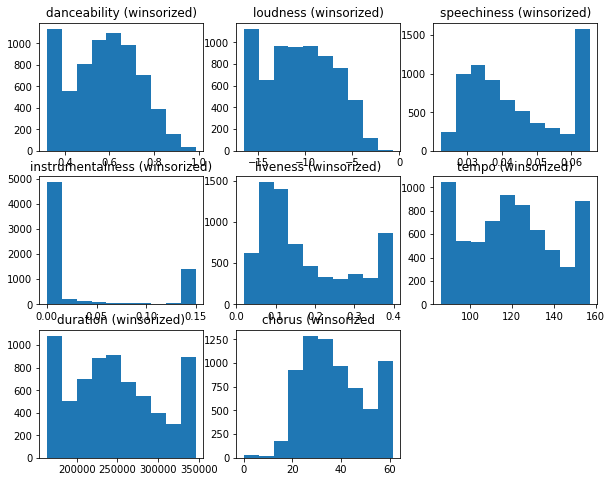

In [26]:
plt.figure(figsize=(10,8))

plt.subplot(3,3,1)
plt.hist(winsorized_df['winsorized_dance'])
plt.title('danceability (winsorized)')

plt.subplot(3,3,2)
plt.hist(winsorized_df['winsorized_loud'])
plt.title('loudness (winsorized)')

plt.subplot(3,3,3)
plt.hist(winsorized_df['winsorized_speech'])
plt.title('speechiness (winsorized)')

plt.subplot(3,3,4)
plt.hist(winsorized_df['winsorized_instrument'])
plt.title('instrumentalness (winsorized)')

plt.subplot(3,3,5)
plt.hist(winsorized_df['winsorized_live'])
plt.title('liveness (winsorized)')

plt.subplot(3,3,6)
plt.hist(winsorized_df['winsorized_tempo'])
plt.title('tempo (winsorized)')

plt.subplot(3,3,7)
plt.hist(winsorized_df['winsorized_duration'])
plt.title('duration (winsorized)')

plt.subplot(3,3,8)
plt.hist(winsorized_df['winsorized_chorus'])
plt.title('chorus (winsorized')

plt.show()

Determined each numeric features's outliers threshold, winsorized the features to limit the numbers of outliers, and compared the winsorized data to the original dataset. Limiting the upper limit decreased the max value for several features, however, had no major effect on the means and standard deviations. Most means and standard deviations remained relatively similar within a range of -5.0 to +5.0. Winsorized instrumental's mean dropped from 0.1 to 0.04 and standard deviation dropped from 0.3 to 0.06. Winsorized duration's standard deviation increased from 1.07e5 to 5.66e5. Columns 'energy', 'acousticness', and 'valence' were not winsorized since they were not winsorized/showed no outliers with boxplot graph (whis=1.5). Removed repetitive columns in new winsorized dataset. 

In [27]:
from wordcloud import WordCloud

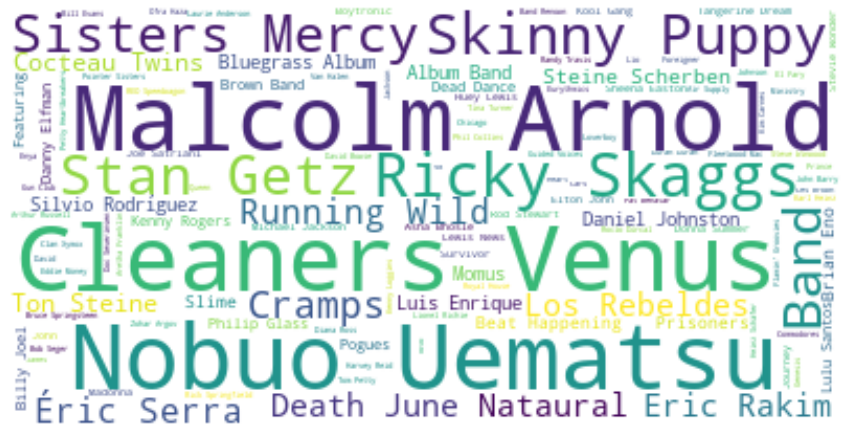

In [28]:
wordcloud = WordCloud(background_color='white').generate(' '.join(df['artist']))
plt.figure(figsize=(15,10))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Created word cloud image to visualize most frequently occurring artists. 

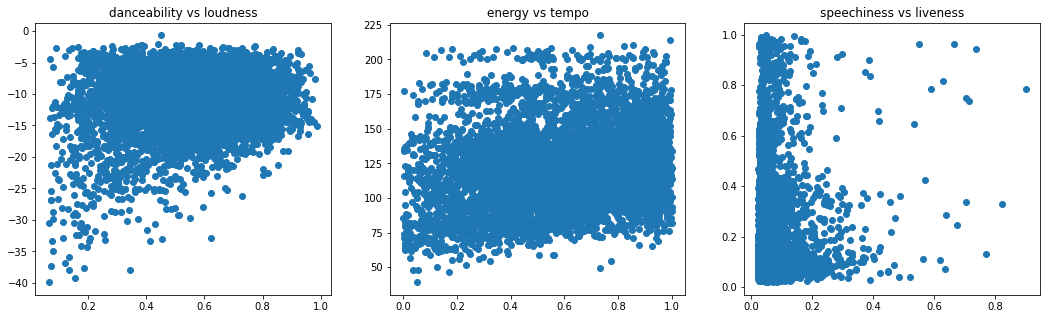

In [29]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.scatter(df["danceability"], df["loudness"])
plt.title("danceability vs loudness")

plt.subplot(1,3,2)
plt.scatter(df["energy"], df["tempo"])
plt.title("energy vs tempo")

plt.subplot(1,3,3)
plt.scatter(df["speechiness"], df["liveness"])
plt.title("speechiness vs liveness")

plt.show()

In [30]:
df.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,target
danceability,1.000000,0.166161,0.196825,0.056490,-0.241466,-0.307968,-0.162616,0.609570,-0.092411,0.023058,-0.019991,0.347748
energy,0.166161,1.000000,0.746408,0.145268,-0.664995,-0.181078,0.188647,0.364493,0.208639,-0.022062,0.013331,0.185201
loudness,0.196825,0.746408,1.000000,0.043084,-0.475267,-0.328700,0.105713,0.292653,0.140544,-0.070555,-0.009761,0.248918
speechiness,0.056490,0.145268,0.043084,1.000000,-0.039662,-0.006111,0.135611,-0.010153,0.025760,0.013136,0.032715,-0.195129
acousticness,-0.241466,-0.664995,-0.475267,-0.039662,1.000000,0.205254,-0.058258,-0.291904,-0.160443,-0.014716,-0.009867,-0.292108
instrumentalness,-0.307968,-0.181078,-0.328700,-0.006111,0.205254,1.000000,-0.000175,-0.293831,-0.063820,0.043701,0.022472,-0.386725
liveness,-0.162616,0.188647,0.105713,0.135611,-0.058258,-0.000175,1.000000,-0.062093,0.028145,0.018598,0.044822,-0.101236
valence,0.609570,0.364493,0.292653,-0.010153,-0.291904,-0.293831,-0.062093,1.000000,0.138075,-0.093354,-0.053732,0.262301
tempo,-0.092411,0.208639,0.140544,0.025760,-0.160443,-0.063820,0.028145,0.138075,1.000000,-0.061561,-0.068207,0.044943
duration_ms,0.023058,-0.022062,-0.070555,0.013136,-0.014716,0.043701,0.018598,-0.093354,-0.061561,1.000000,0.108617,0.022023


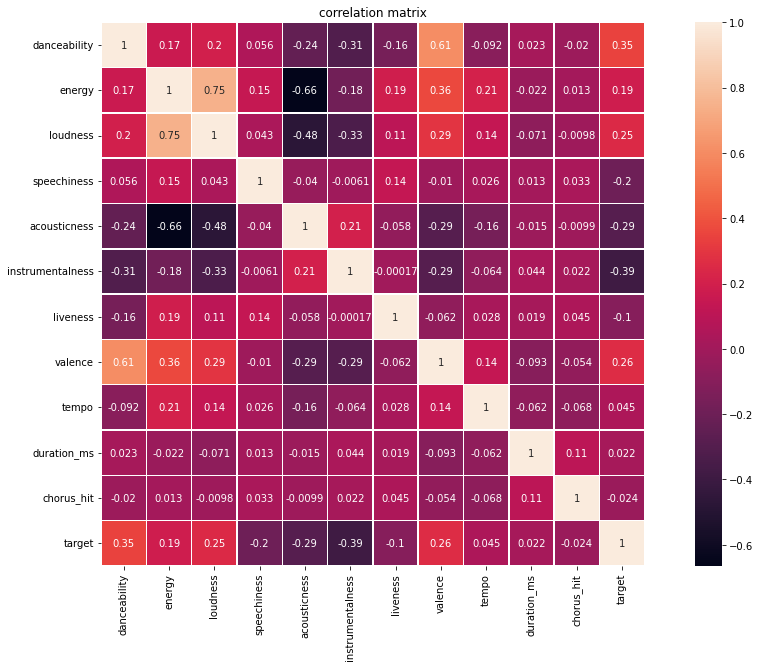

In [31]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")
plt.show()


In [32]:
winsorized_df.corr()

,energy,acousticness,valence,target,winsorized_dance,winsorized_loud,winsorized_speech,winsorized_instrument,winsorized_live,winsorized_tempo,winsorized_duration,winsorized_chorus
energy,1.000000,-0.664995,0.364493,0.185201,0.156124,0.725485,0.293741,-0.115867,0.191737,0.212554,0.030439,0.010159
acousticness,-0.664995,1.000000,-0.291904,-0.292108,-0.240766,-0.417717,-0.133863,0.132879,-0.061603,-0.164110,-0.102321,-0.011253
valence,0.364493,-0.291904,1.000000,0.262301,0.592435,0.222889,0.026630,-0.248342,-0.041466,0.130216,-0.051406,-0.028608
target,0.185201,-0.292108,0.262301,1.000000,0.337774,0.216092,-0.220071,-0.380514,-0.109046,0.051320,0.124213,-0.004888
winsorized_dance,0.156124,-0.240766,0.592435,0.337774,1.000000,0.095825,0.036248,-0.236793,-0.165420,-0.104196,0.129222,0.002320
winsorized_loud,0.725485,-0.417717,0.222889,0.216092,0.095825,1.000000,0.115862,-0.212575,0.122291,0.117160,-0.020021,-0.001388
winsorized_speech,0.293741,-0.133863,0.026630,-0.220071,0.036248,0.115862,1.000000,0.089905,0.138010,0.085368,-0.002511,0.013406
winsorized_instrument,-0.115867,0.132879,-0.248342,-0.380514,-0.236793,-0.212575,0.089905,1.000000,0.003062,-0.037855,0.021800,0.010598
winsorized_live,0.191737,-0.061603,-0.041466,-0.109046,-0.165420,0.122291,0.138010,0.003062,1.000000,0.034067,-0.043696,0.015331
winsorized_tempo,0.212554,-0.164110,0.130216,0.051320,-0.104196,0.117160,0.085368,-0.037855,0.034067,1.000000,-0.070039,-0.070245


There are no significant correlations between the features of both original and cleaned/winsorized datasets.

In [33]:
df.groupby('target').mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit
target,,,,,,,,,,,
0,0.504073,0.563043,-12.207036,0.069177,0.381555,0.251287,0.219398,0.518783,119.431343,252393.034453,40.223036
1,0.624444,0.653031,-9.876752,0.046635,0.204579,0.028439,0.182619,0.657061,121.867801,257119.786335,39.287307


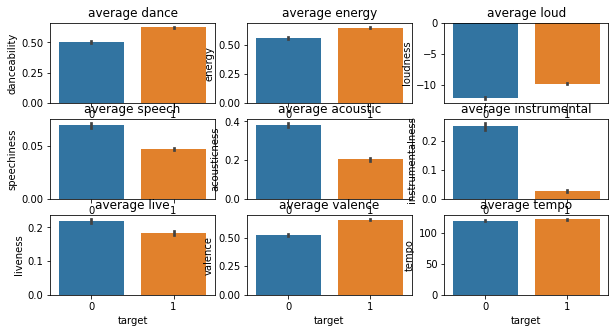

In [78]:
plt.figure(figsize=(10,5))

plt.subplot(3,3,1)
sns.barplot(df["target"], df["danceability"])
plt.title("average dance")

plt.subplot(3,3,2)
sns.barplot(df["target"], df["energy"])
plt.title("average energy")

plt.subplot(3,3,3)
sns.barplot(df["target"],df["loudness"])
plt.title("average loud")

plt.subplot(3,3,4)
sns.barplot(df["target"], df["speechiness"])
plt.title("average speech")

plt.subplot(3,3,5)
sns.barplot(df["target"], df["acousticness"])
plt.title("average acoustic")

plt.subplot(3,3,6)
sns.barplot(df["target"],df["instrumentalness"])
plt.title("average instrumental")

plt.subplot(3,3,7)
sns.barplot(df["target"], df["liveness"])
plt.title("average live")

plt.subplot(3,3,8)
sns.barplot(df["target"], df["valence"])
plt.title("average valence")

plt.subplot(3,3,9)
sns.barplot(df["target"],df["tempo"])
plt.title("average tempo")

plt.show()

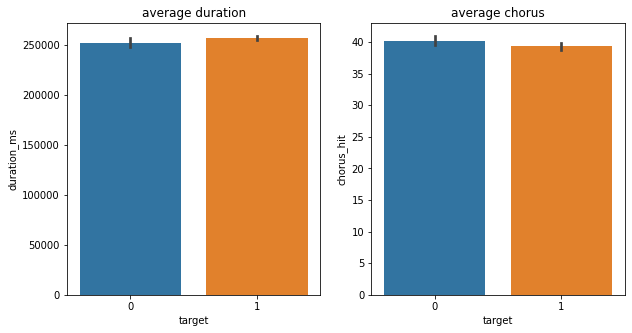

In [81]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(df["target"], df["duration_ms"])
plt.title("average duration")

plt.subplot(1,2,2)
sns.barplot(df["target"], df["chorus_hit"])
plt.title("average chorus")

plt.show()


In [76]:
target = df["target"].unique()
grouped_df = df.groupby("target")
for var in ["danceability", 'energy', "tempo", "loudness", 'acousticness', 'speechiness', 'liveness', 'valence', 'instrumentalness', 'duration_ms', 'chorus_hit']:
    print('\n')
    print("Comparisons for variable: {}".format(var))
    for i in range(0, len(target)):
        for j in range(i+1, len(target)):
            print("t-test between groups {0} and {1}:".format(target[i], target[j]))
            print(stats.ttest_ind(
                df[df["target"]==target[i]][var], 
                df[df["target"]==target[j]][var]
            ))



Comparisons for variable: danceability
t-test between groups 0 and 1:
Ttest_indResult(statistic=-30.822312109833078, pvalue=1.4335407834235846e-195)


Comparisons for variable: energy
t-test between groups 0 and 1:
Ttest_indResult(statistic=-15.661608478452207, pvalue=2.3649332211155947e-54)


Comparisons for variable: tempo
t-test between groups 0 and 1:
Ttest_indResult(statistic=-3.738635209132838, pvalue=0.0001865176280611047)


Comparisons for variable: loudness
t-test between groups 0 and 1:
Ttest_indResult(statistic=-21.357923537655914, pvalue=4.6275525713644146e-98)


Comparisons for variable: acousticness
t-test between groups 0 and 1:
Ttest_indResult(statistic=25.38192961270904, pvalue=5.841110975923147e-136)


Comparisons for variable: speechiness
t-test between groups 0 and 1:
Ttest_indResult(statistic=16.533505920458722, pvalue=2.995092984277847e-60)


Comparisons for variable: liveness
t-test between groups 0 and 1:
Ttest_indResult(statistic=8.45636382799537, pvalue=3.33

T-test results between targets 0 (flops) and 1 (hits) with original data indicate statistical significance amongst all features besides duration_ms. 

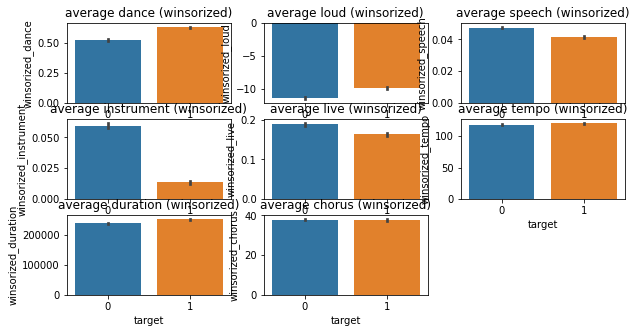

In [83]:
plt.figure(figsize=(10,5))

plt.subplot(3,3,1)
sns.barplot(winsorized_df["target"], winsorized_df["winsorized_dance"])
plt.title("average dance (winsorized)")

plt.subplot(3,3,2)
sns.barplot(winsorized_df["target"], winsorized_df["winsorized_loud"])
plt.title("average loud (winsorized)")

plt.subplot(3,3,3)
sns.barplot(winsorized_df["target"],winsorized_df["winsorized_speech"])
plt.title("average speech (winsorized)")

plt.subplot(3,3,4)
sns.barplot(winsorized_df["target"], winsorized_df["winsorized_instrument"])
plt.title("average instrument (winsorized)")

plt.subplot(3,3,5)
sns.barplot(winsorized_df["target"], winsorized_df["winsorized_live"])
plt.title("average live (winsorized)")

plt.subplot(3,3,6)
sns.barplot(winsorized_df["target"],winsorized_df["winsorized_tempo"])
plt.title("average tempo (winsorized)")

plt.subplot(3,3,7)
sns.barplot(winsorized_df["target"], winsorized_df["winsorized_duration"])
plt.title("average duration (winsorized)")

plt.subplot(3,3,8)
sns.barplot(winsorized_df["target"], winsorized_df["winsorized_chorus"])
plt.title("average chorus (winsorized)")

plt.show()

In [35]:
target = winsorized_df["target"].unique()
grouped_df = winsorized_df.groupby("target")
for var in ["winsorized_dance", "winsorized_tempo", "winsorized_loud", 'winsorized_speech', 'winsorized_live', 'winsorized_instrument', 'winsorized_duration', 'winsorized_chorus']:
    print('\n')
    print("Comparisons for variable: {}".format(var))
    for i in range(0, len(target)):
        for j in range(i+1, len(target)):
            print("t-test between groups {0} and {1}:".format(target[i], target[j]))
            print(stats.ttest_ind(
                winsorized_df[winsorized_df["target"]==target[i]][var], 
                winsorized_df[winsorized_df["target"]==target[j]][var]
            ))



Comparisons for variable: winsorized_dance
t-test between groups 0 and 1:
Ttest_indResult(statistic=-29.82259602253616, pvalue=6.123532594956674e-184)


Comparisons for variable: winsorized_tempo
t-test between groups 0 and 1:
Ttest_indResult(statistic=-4.270433056409104, pvalue=1.977081883563574e-05)


Comparisons for variable: winsorized_loud
t-test between groups 0 and 1:
Ttest_indResult(statistic=-18.392292193830276, pvalue=8.569967977322429e-74)


Comparisons for variable: winsorized_speech
t-test between groups 0 and 1:
Ttest_indResult(statistic=18.7480126663816, pvalue=1.558481744932317e-76)


Comparisons for variable: winsorized_live
t-test between groups 0 and 1:
Ttest_indResult(statistic=9.116331582259784, pvalue=1.0018094722049418e-19)


Comparisons for variable: winsorized_instrument
t-test between groups 0 and 1:
Ttest_indResult(statistic=34.19380662919311, pvalue=7.040136477214313e-237)


Comparisons for variable: winsorized_duration
t-test between groups 0 and 1:
Ttest

T-test results between targets 0 (flops) and 1 (hits) with winsorized data indicate statistical significance amongst all features besides winsorized_chorus. 

In [36]:
from scipy.stats import boxcox


In [37]:
dance_boxcox,_ = boxcox(winsorized_df['winsorized_dance'])
energy_boxcox,_ = boxcox(winsorized_df['energy'])
speech_boxcox,_ = boxcox(winsorized_df['winsorized_speech'])
acoustic_boxcox,_ = boxcox(winsorized_df['acousticness'])
# instrument_boxcox,_ = boxcox(df['winsorized_instrument'])
live_boxcox,_ = boxcox(winsorized_df['winsorized_live'])
valence_boxcox,_ = boxcox(winsorized_df['valence'])
tempo_boxcox,_ = boxcox(winsorized_df['winsorized_tempo'])
duration_boxcox,_ = boxcox(winsorized_df['winsorized_duration'])
# chorus_boxcox,_ = boxcox(df['winsorized_chorus'])

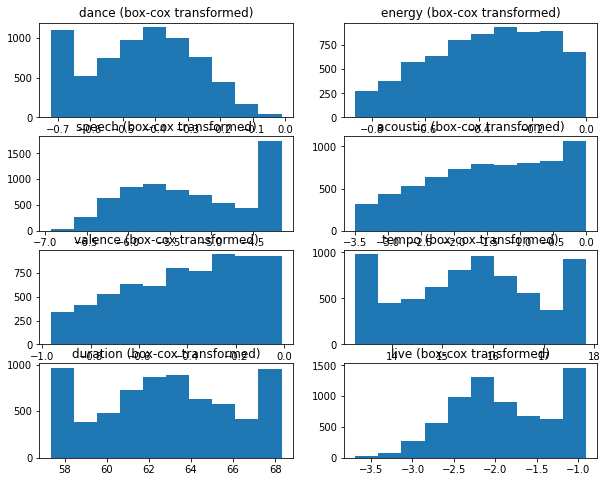

In [38]:
plt.figure(figsize=(10,8))

plt.subplot(4, 2, 1)
plt.hist(dance_boxcox)
plt.title("dance (box-cox transformed)")

plt.subplot(4, 2, 2)
plt.hist(energy_boxcox)
plt.title("energy (box-cox transformed)")

plt.subplot(4, 2, 3)
plt.hist(speech_boxcox)
plt.title("speech (box-cox transformed)")

plt.subplot(4, 2, 4)
plt.hist(acoustic_boxcox)
plt.title("acoustic (box-cox transformed)")

plt.subplot(4, 2, 5)
plt.hist(valence_boxcox)
plt.title("valence (box-cox transformed)")

plt.subplot(4, 2, 6)
plt.hist(tempo_boxcox)
plt.title("tempo (box-cox transformed)")

plt.subplot(4, 2, 7)
plt.hist(duration_boxcox)
plt.title("duration (box-cox transformed)")

plt.subplot(4, 2, 8)
plt.hist(live_boxcox)
plt.title("live (box-cox transformed)")
plt.show()

In [39]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(dance_boxcox)
norm_stats = normaltest(dance_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(energy_boxcox)
norm_stats = normaltest(energy_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(speech_boxcox)
norm_stats = normaltest(speech_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(acoustic_boxcox)
norm_stats = normaltest(acoustic_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(valence_boxcox)
norm_stats = normaltest(valence_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(tempo_boxcox)
norm_stats = normaltest(tempo_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(duration_boxcox)
norm_stats = normaltest(duration_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(live_boxcox)
norm_stats = normaltest(live_boxcox)
print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 210.59646011838157 and p value is 0.0
Normality test statistics is 715.0260065015796 and p value is 5.420950972714845e-156
Jarque-Bera test statistics is 317.63837850707614 and p value is 0.0
Normality test statistics is 918.5338836473567 and p value is 3.490610939286008e-200
Jarque-Bera test statistics is 462.14329664464975 and p value is 0.0
Normality test statistics is 12403.667909946238 and p value is 0.0
Jarque-Bera test statistics is 367.1366539864353 and p value is 0.0
Normality test statistics is 1659.9429574947633 and p value is 0.0
Jarque-Bera test statistics is 406.382116056518 and p value is 0.0
Normality test statistics is 1418.244699307901 and p value is 1.0766549737523747e-308
Jarque-Bera test statistics is 268.00034437027983 and p value is 0.0
Normality test statistics is 1298.2713117092264 and p value is 1.2132956923461807e-282
Jarque-Bera test statistics is 269.496805390185 and p value is 0.0
Normality test statistics is 1321.36843182464

Used boxcox transformation to normalize the distribution. Did not include features loudness, instrumentalness, or chorus_hit as they were not positive. However, data did not seem any more/less normal. 

In [40]:
df['target'].value_counts()

0    3454
1    3454
Name: target, dtype: int64

In [41]:
winsorized_df['target'].value_counts()

0    3454
1    3454
Name: target, dtype: int64

Both original and cleaned dataframes have well balanced datasets and can be used for modeling. 

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [43]:
X = df.drop(['artist','target'],axis=1)
y = df['target']
print(X.shape)
print(y.shape)

(6908, 11)
(6908,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [45]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=12)
lr.fit(X_train, y_train)

lr_score_o = lr.score(X_test, y_test)

lr_predictions = lr.predict(X_test)

print('accuracy score (non-winsorized): {:.3f}'.format(lr_score_o))

accuracy score (non-winsorized): 0.576


In [46]:
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print('accuracy score for 5-folds (non-winsorized):', cv_scores)
print('mean cross validitation score: {:.3f}'.format(np.mean(cv_scores)))

accuracy score for 5-folds (non-winsorized): [0.57859209 0.503861   0.503861   0.50289575 0.50289575]
mean cross validitation score: 0.518


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

In [48]:
confusion = confusion_matrix(y_test, lr_predictions, labels=[1,0])
print(confusion)

[[510 336]
 [397 484]]


In [49]:
report = classification_report(y_test, lr_predictions)
print(report)

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       881
           1       0.56      0.60      0.58       846

    accuracy                           0.58      1727
   macro avg       0.58      0.58      0.58      1727
weighted avg       0.58      0.58      0.58      1727



According to the Logistic Regression model's confusion matrix and classification report of the original data, the model accurately classifies true positives 510 times, true negatives 484 times, false positives 397, and false negatives 336 times giving an overall accuracy f1 score of 0.58.  

In [50]:
X = winsorized_df.drop(['target'], axis=1)
y = winsorized_df['target']

print(X.shape)
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

(6908, 11)
(6908,)


In [51]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=12)
lr.fit(X_train, y_train)

lr_score_w = lr.score(X_test, y_test)
lr_predictions = lr.predict(X_test)

print('accuracy score (winsorized): {:.3f}'.format(lr_score_w))

accuracy score (winsorized): 0.490


In [52]:
clf = LogisticRegression(solver='lbfgs')
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

print('accuracy score for 5-folds (winsorized:', cv_scores)
print('mean cross validitation score: {:.3f}'.format(np.mean(cv_scores)))

accuracy score for 5-folds (winsorized: [0.50337512 0.503861   0.503861   0.50289575 0.50289575]
mean cross validitation score: 0.503


In [53]:
confusion = confusion_matrix(y_test, lr_predictions, labels=[1,0])
print(confusion)

report = classification_report(y_test, lr_predictions)
print(report)

[[846   0]
 [881   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       881
           1       0.49      1.00      0.66       846

    accuracy                           0.49      1727
   macro avg       0.24      0.50      0.33      1727
weighted avg       0.24      0.49      0.32      1727



According to the Logistic Regression model's confusion matrix and classification report of the winsorized data, the model accurately classifies true positives 846 times, true negatives 0 times, false positives 881, and false negatives 0 times giving an overall accuracy f1 score of 0.49.  

Logistic regression of the mean cross validation score using 5-folds of both original and winsorized data were relatively close with the original data's score being 0.518 on average and the winsorized data's score being 0.503 on average. When looking further into the classification report and confusion matrix, we can see that the winsorized data yielded a f1 score of 0.49 compared to the original dataset's f1 score of 0.58. 

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rfc = RandomForestClassifier(random_state=12)
X = df.drop(['artist','target'],axis=1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=12)

cv_score = cross_val_score(rfc, X, Y, cv=5)
print('mean cross validation score (non-winsorized): {:.3f}'.format(np.mean(cv_score)))

mean cross validation score (non-winsorized): 0.802


In [56]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_score_o = rf_clf.score(X_test, y_test)
print(rf_score_o)

rf_predictions = rf_clf.predict(X_test)

confusion = confusion_matrix(y_test, rf_predictions, labels=[1,0])
print(confusion)


rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

0.7955993051534452
[[700 146]
 [207 674]]
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       881
           1       0.77      0.83      0.80       846

    accuracy                           0.80      1727
   macro avg       0.80      0.80      0.80      1727
weighted avg       0.80      0.80      0.80      1727



According to the Random Forest model's confusion matrix and classification report of the original data, the model accurately classifies true positives 700 times, true negatives 674 times, false positives 207, and false negatives 146 times giving an overall accuracy f1 score of 0.80.

In [57]:
params = {'n_estimators': [1000, 1500], 
          'max_features': [2, 4], 
          'max_depth': [6, 8],
          }

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8], 'max_features': [2, 4],
                         'n_estimators': [1000, 1500]},
             scoring='accuracy')

In [58]:
print(clf.best_params_)
print(clf.best_score_)

{'max_depth': 8, 'max_features': 2, 'n_estimators': 1500}
0.8033218781531222


In [59]:
rfc = RandomForestClassifier(n_estimators=1500, max_features=4, max_depth=8)


rfc.fit(X_train, y_train)

rfc_predictions = rfc.predict(X_test)

confusion = confusion_matrix(y_test, rfc_predictions, labels=[1,0])
print(confusion)


rfc_report = classification_report(y_test, rfc_predictions)
print(rfc_report)


[[729 117]
 [244 637]]
              precision    recall  f1-score   support

           0       0.84      0.72      0.78       881
           1       0.75      0.86      0.80       846

    accuracy                           0.79      1727
   macro avg       0.80      0.79      0.79      1727
weighted avg       0.80      0.79      0.79      1727



Using GridSearchCV, we tune up the hyperparameters of RandomForestClassifier on the original dataset (since the original data yielded a slightly more accurate score) to see what parameters give us the best score. After several tests, the best parameters were n_estimators=1500, max_features=4, max_depth=8 giving us an f1 score of 0.79 which is slightly lower than the f1 score of the original data. 

In [60]:
rfc = RandomForestClassifier(random_state=12)
X = winsorized_df.drop(['target'], axis=1)
Y = winsorized_df['target']


X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=12)


cv_score = cross_val_score(rfc, X, Y, cv=5)
print('mean cross validation score (winsorized): {:.3f}'.format(np.mean(cv_score)))


mean cross validation score (winsorized): 0.794


In [61]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


rf_score_w = rf_clf.score(X_test, y_test)
print(rf_score_w)
rf_predictions = rf_clf.predict(X_test)

confusion = confusion_matrix(y_test, rf_predictions, labels=[1,0])
print(confusion)


rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

0.7863346844238563
[[685 161]
 [208 673]]
              precision    recall  f1-score   support

           0       0.81      0.76      0.78       881
           1       0.77      0.81      0.79       846

    accuracy                           0.79      1727
   macro avg       0.79      0.79      0.79      1727
weighted avg       0.79      0.79      0.79      1727



According to the Random Forest model's confusion matrix and classification report of the winsorized data, the model accurately classifies true positives 685 times, true negatives 673 times, false positives 208, and false negatives 161 times giving an overall accuracy f1 score of 0.79.

Random forest for the original data had a slightly higher mean validation score (0.802) compared to the winsorized data (0.794).

In [62]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=5)
X = df.drop(['artist','target'],axis=1)
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=12)

neighbors.fit(X_train,y_train)



KNeighborsClassifier()

In [63]:
print(neighbors.predict(X_test))
print(neighbors.predict_proba(X_test))

[1 0 0 ... 1 1 1]
[[0.4 0.6]
 [0.6 0.4]
 [0.6 0.4]
 ...
 [0.4 0.6]
 [0.4 0.6]
 [0.2 0.8]]


In [64]:
score = cross_val_score(neighbors, X, Y, cv=5)
print('unweighted score (non-winsorized): {:.3f}'.format(score.mean()))

unweighted score (non-winsorized): 0.610


In [65]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

knn_score_o = knn_clf.score(X_test, y_test)
print(knn_score_o)


knn_predictions = knn_clf.predict(X_test)

confusion = confusion_matrix(y_test, knn_predictions, labels=[1,0])
print(confusion)


knn_report = classification_report(y_test, knn_predictions)
print(knn_report)

0.6068326577880718
[[552 294]
 [385 496]]
              precision    recall  f1-score   support

           0       0.63      0.56      0.59       881
           1       0.59      0.65      0.62       846

    accuracy                           0.61      1727
   macro avg       0.61      0.61      0.61      1727
weighted avg       0.61      0.61      0.61      1727



According to KNN's confusion matrix and classification report of the original data, the model accurately classifies true positives 552 times, true negatives 496 times, false positives 385, and false negatives 294 times giving an overall accuracy f1 score of 0.61.

In [66]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = winsorized_df.drop(['target'], axis=1)
Y = winsorized_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=12)

neighbors.fit(X_train, y_train)

KNeighborsClassifier()

In [67]:
print(neighbors.predict(X_test))
print(neighbors.predict_proba(X_test))

[1 0 0 ... 1 1 1]
[[0.4 0.6]
 [0.6 0.4]
 [1.  0. ]
 ...
 [0.4 0.6]
 [0.4 0.6]
 [0.2 0.8]]


In [68]:
score = cross_val_score(neighbors, X, Y, cv=5)
print('unweighted score (winsorized): {:.3f}'.format(score.mean()))

unweighted score (winsorized): 0.615


In [71]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

knn_score_w = knn_clf.score(X_test, y_test)
print(knn_score_w)


knn_predictions = knn_clf.predict(X_test)

confusion = confusion_matrix(y_test, knn_predictions, labels=[1,0])
print(confusion)


knn_report = classification_report(y_test, knn_predictions)
print(knn_report)

0.6137811233352635
[[557 289]
 [378 503]]
              precision    recall  f1-score   support

           0       0.64      0.57      0.60       881
           1       0.60      0.66      0.63       846

    accuracy                           0.61      1727
   macro avg       0.62      0.61      0.61      1727
weighted avg       0.62      0.61      0.61      1727



According to KNN's confusion matrix and classification report of the winsorized data, the model accurately classifies true positives 557 times, true negatives 503 times, false positives 378, and false negatives 289 times giving an overall accuracy f1 score of 0.61.

KNN model's f1 score of original data and winsorized data was both 0.61. While the unweighted cross validation score (5-fold) for original was 0.610 and winsorized data cross validation score (5-fold) was a slightly higher score of 0.615.

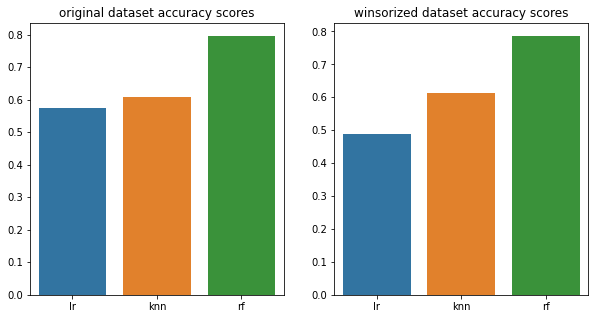

In [74]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.barplot(['lr', 'knn', 'rf'], [lr_score_o,knn_score_o,rf_score_o])
plt.title("original dataset accuracy scores")

plt.subplot(1,2,2)
sns.barplot(['lr', 'knn', 'rf'], [lr_score_w,knn_score_w,rf_score_w])
plt.title("winsorized dataset accuracy scores")
plt.show()

Based on the 3 models chosen to compared the original dataset and cleaned (winsorized) dataset, Random Forest has the highest accuracy for 5-folds for both datasets (around 80% accuracy) with the original data yielding a slightly higher score. The original dataset and winsorized dataset do not have any large difference in terms of accuracy between models. In terms of precision and recall scores, we want to be able to accurate predict what porportions of positive predictions are actually correct (we want to be able to accurately identify what determines a song to be a hit/flop) so therefore we would need a model with a higher precision score. Random Forest (for the original dataset) also has the highest precision score out of all models for both original and winsorized datasets. 